In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [52]:
def obj_func(r1,r2,beta):
    H= np.exp(-beta*r1/r2) - r2**2 *(1-np.exp(-beta*r1/r2))
    return H

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_58389/1526398399.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(r2_vec,H,label=f"$\Delta v/v_{{ch}}$ = {r1}")


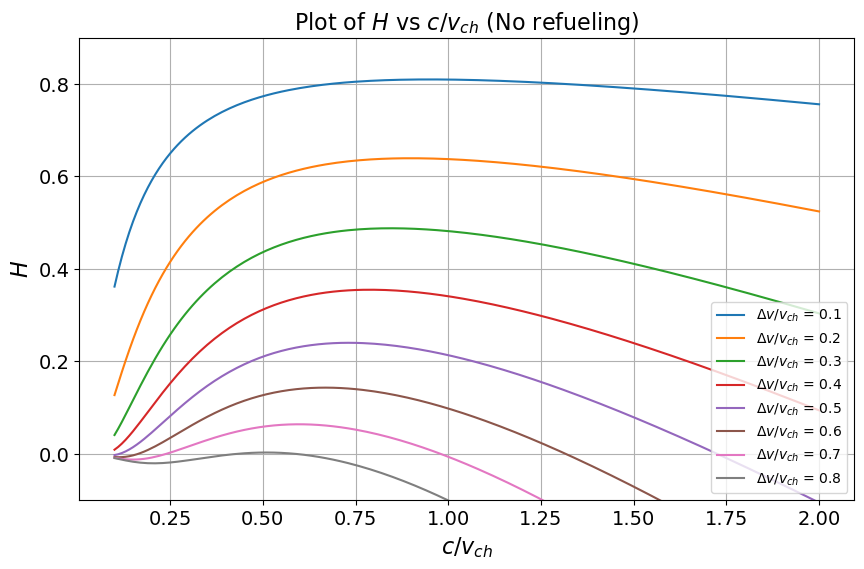

In [53]:
r1_vec=np.array([.1,.2,.3,.4,.5,.6,.7,.8])
r2_vec=np.arange(0.1,2.01,0.01)


fig=plt.figure(figsize=(10,6))
max_H=[]
opt_r2=[]
for r1 in r1_vec:
    H=obj_func(r1,r2_vec,1)
    plt.plot(r2_vec,H,label=f"$\Delta v/v_{{ch}}$ = {r1}")
    
plt.ylim([-.1,.9])
    
plt.xlabel('$c/v_{ch}$',fontsize=16)  
plt.ylabel('$H$',fontsize=16)   
plt.title(r'Plot of $H$ vs $c/v_{ch}$ (No refueling)',fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/HvsC_No_refueling.png",bbox_inches='tight')
plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_58389/3292862970.py:26: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta v/v_{ch}$',fontsize=16)


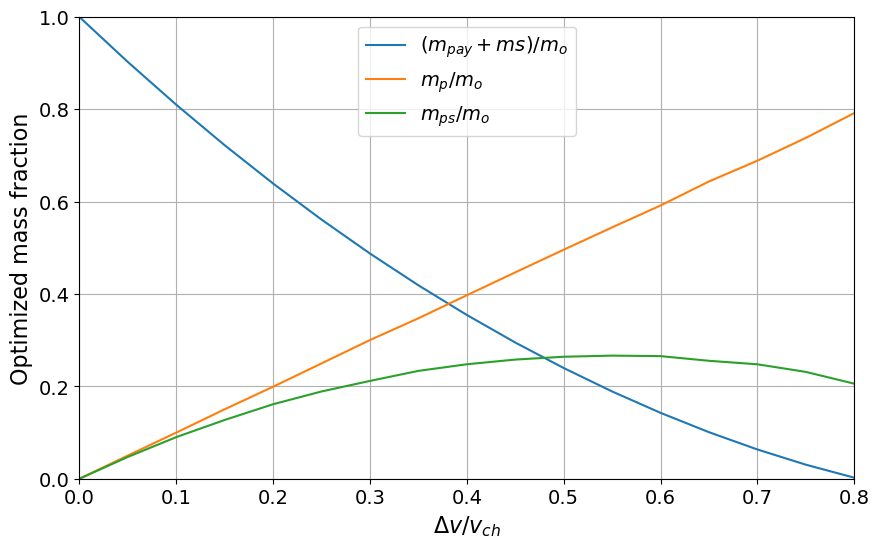

In [54]:
r1_vec=np.arange(0,0.81,0.05)
r2_vec=np.arange(0.1,2.01,0.01)

max_H=[]
opt_r2=[]
opt_mp=[]
opt_mps=[]
for r1 in r1_vec:
    H=obj_func(r1,r2_vec,1)
    r2_opt=r2_vec[np.argmax(H)]
    mp=1-np.exp(-r1/r2_opt)
    mps=(r2_opt**2) *(1-np.exp(-r1/r2_opt))
    
    max_H.append(np.max(H)) 
    opt_mp.append(np.min(mp))
    opt_mps.append(np.min(mps))
    
fig=plt.figure(figsize=(10,6))    
plt.plot(r1_vec,max_H,label=r"$(m_{pay}+m{s})/m_o$")
plt.plot(r1_vec,opt_mp,label=r"$m_p/m_o$")
plt.plot(r1_vec,opt_mps,label=r"$m_{ps}/m_o$")
 
plt.xlim([0,0.8])   
plt.ylim([0,1])
    
plt.xlabel('$\Delta v/v_{ch}$',fontsize=16)  
plt.ylabel('Optimized mass fraction',fontsize=16)     
plt.legend(loc="best",fontsize=14)  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/fractions_No_refueling.png",bbox_inches='tight')
plt.show()

<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_58389/1865834954.py:25: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta v/v_{ch}$',fontsize=16)


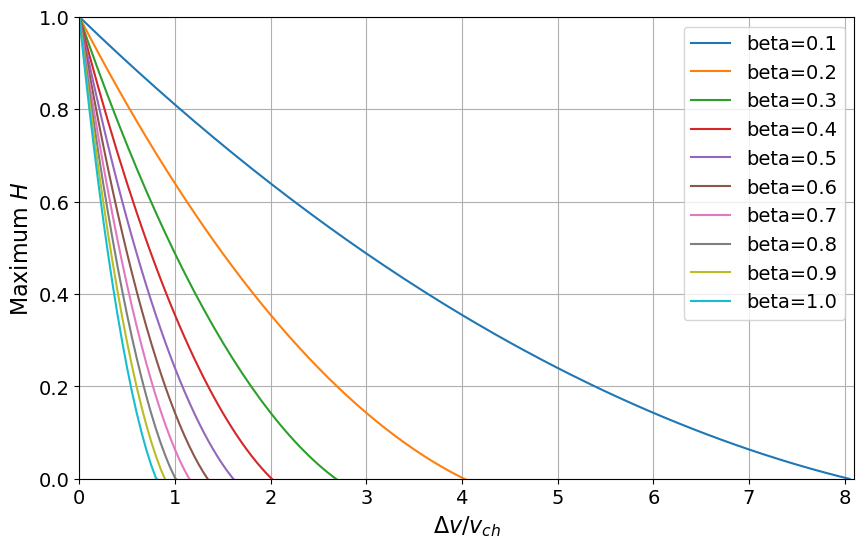

In [55]:
r1_vec=np.arange(0,8.1,0.05)
r2_vec=np.arange(0.1,2.01,0.01)
beta_vec=np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

fig=plt.figure(figsize=(10,6)) 

r1_closest_to_zero = {}
for beta in beta_vec:
    max_H=[]
    for r1 in r1_vec:
        H=obj_func(r1,r2_vec,beta)
        max_H.append(np.max(H)) 
    # Find the r1 value where H is closest to 0
    closest_index = np.argmin(np.abs(max_H))
    r1_closest_to_zero[beta] = r1_vec[closest_index]
    
    plt.plot(r1_vec,max_H,label=f"beta={beta}")
    


 
plt.xlim([0,8.1])   
plt.ylim([0,1])
    
plt.xlabel('$\Delta v/v_{ch}$',fontsize=16)  
plt.ylabel('Maximum $H$',fontsize=16)     
plt.legend(loc="best",fontsize=14)  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/fractions_refueling.png",bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

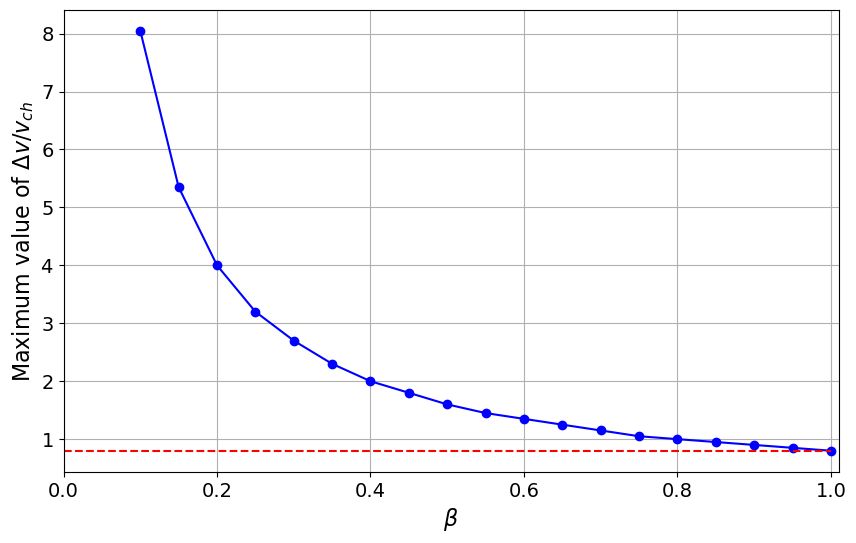

In [56]:
r1_vec=np.arange(0,8.1,0.05)
r2_vec=np.arange(0.1,2.01,0.01)
beta_vec=np.arange(0.1,1.01,0.05)

fig=plt.figure(figsize=(10,6)) 

r1_closest_to_zero = {}
for beta in beta_vec:
    max_H=[]
    for r1 in r1_vec:
        H=obj_func(r1,r2_vec,beta)
        max_H.append(np.max(H)) 
    # Find the r1 value where H is closest to 0
    closest_index = np.argmin(np.abs(max_H))
    r1_closest_to_zero[beta] = r1_vec[closest_index]



# Plot r1_closest_to_zero vs beta
beta_vals = list(r1_closest_to_zero.keys())
r1_vals = list(r1_closest_to_zero.values())

plt.figure(figsize=(10, 6))
plt.plot(beta_vals, r1_vals, 'ob-')
plt.plot(np.array([0,1]),np.array([r1_vals[-1],r1_vals[-1]]),"r--")
plt.xlim([0,1.01])

plt.xlabel(r'$\beta$',fontsize=16)
plt.ylabel(r'Maximum value of $\Delta v/v_{ch}$',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig("figures/max_delv.png")

plt.show()


In [57]:
r1=0.8

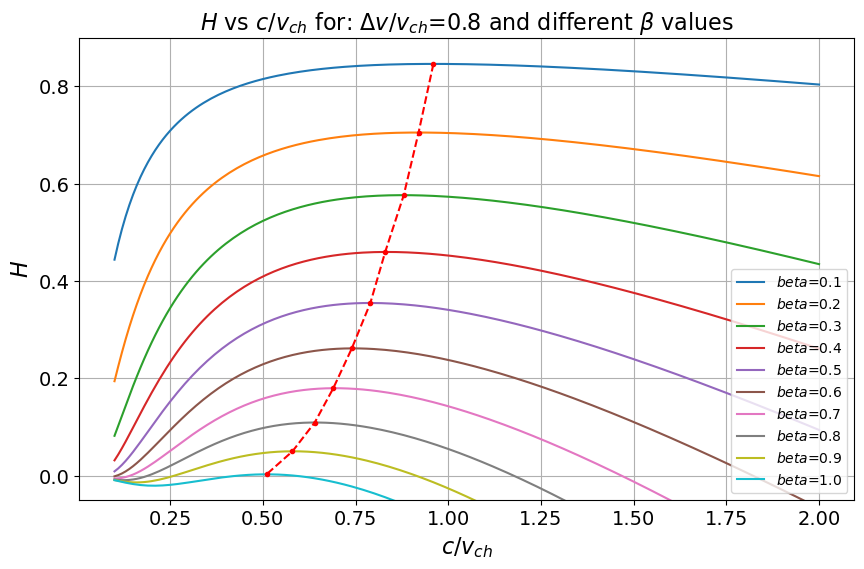

In [58]:

r2_vec=np.arange(0.1,2.01,0.01)
n_vec=np.arange(10,0,-1)
beta_vec=np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])


fig=plt.figure(figsize=(10,6))
max_H=[]
opt_r2=[]
for beta in beta_vec:
    H=obj_func(r1,r2_vec,beta)
    max_H.append(np.max(H))
    opt_r2.append(r2_vec[np.argmax(H)])
    plt.plot(r2_vec,H,label=f'$beta$={beta}')
    
    
plt.plot(opt_r2,max_H,"r.--")
plt.ylim([-0.05,0.9])
    
plt.xlabel('$c/v_{ch}$',fontsize=16)    
plt.ylabel('$H$',fontsize=16)   
plt.title(r'$H$ vs $c/v_{ch}$ for: $\Delta v /v_{ch}$=0.8 and different $\beta$ values',fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/HvsC_refueling.png",bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

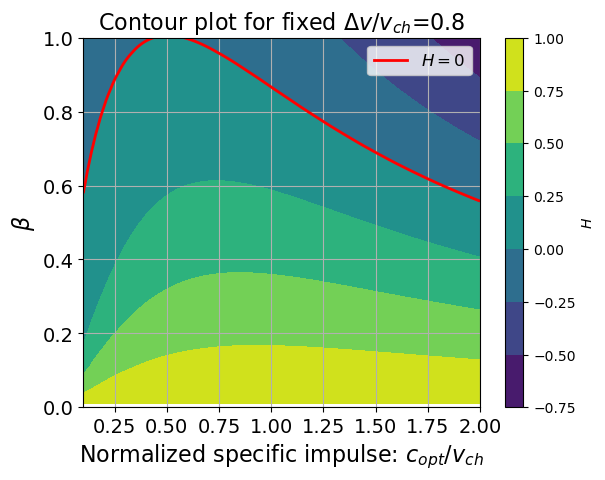

In [59]:
r2_vec=np.arange(0.1,2.01,0.01)
beta_vec=np.arange(0.01,1.1,.05)



fig=plt.figure(figsize=(10,6))
R2, BETA = np.meshgrid(r2_vec, beta_vec)
H = obj_func(r1, R2, BETA)

fig, ax = plt.subplots()
CS = ax.contourf(R2, BETA, H, cmap='viridis')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('$H$')

# Add a red contour line where H=0
contour_line = ax.contour(R2, BETA, H, levels=[0], colors='red', linewidths=2)
# Create a custom legend entry for the red line
legend_line = Line2D([0], [0], color='red', linewidth=2, label='$H=0$')
ax.legend(handles=[legend_line], loc='upper right', fontsize=12)


plt.xlabel('Normalized specific impulse: $c_{opt}/v_{ch}$',fontsize=16) 
plt.ylabel(r'$\beta$',fontsize=16)
plt.title(r'Contour plot for fixed $\Delta v /v_{ch}$=0.8',fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,1])


plt.savefig("figures/HvsC_contour.png",bbox_inches='tight')
plt.show()

In [60]:
def approx_r2_opt(r1,beta):
    r2_opt_approx=1-0.5*(beta*r1) - (1/24)*(beta*r1)**2
    return r2_opt_approx

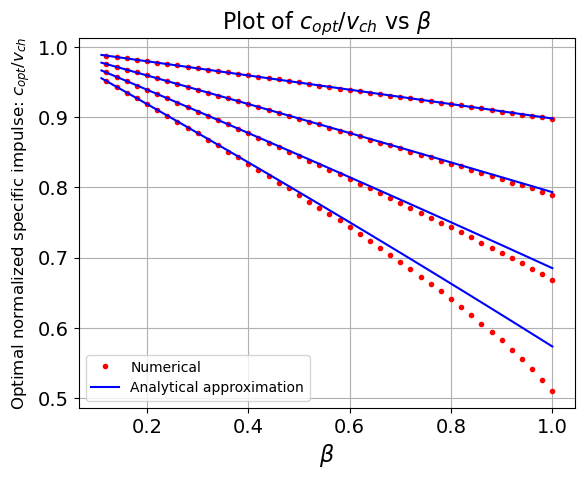

In [61]:
r1_vec=np.array([.2,.4,.6,.8])
r2_vec=np.arange(0.1,2.01,0.001)
beta_vec=np.arange(1,.1,-0.01)

fig=plt.figure()
for r1 in r1_vec:
    max_H=[]
    opt_r2=[]
    r2_opt_approx=[]
    
    for beta in beta_vec:
        H=obj_func(r1,r2_vec,beta)
        max_H.append(np.max(H))
        opt_r2.append(r2_vec[np.argmax(H)])
        r2_opt_approx.append(approx_r2_opt(r1,beta))
    
    plt.plot(beta_vec[::2],opt_r2[::2],".r")
    plt.plot(beta_vec,r2_opt_approx,"b")

    


# Add legends outside the loop
plt.plot([], [], ".r", label="Numerical")
plt.plot([], [], "b", label="Analytical approximation")

plt.xlabel(r'$\beta$',fontsize=16)  
plt.ylabel('Optimal normalized specific impulse: $c_{opt}/v_{ch}$',fontsize=12) 
plt.title(r'Plot of $c_{opt}/v_{ch}$ vs $\beta$',fontsize=16)  
plt.legend(loc="lower left")

plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/copt_approx.png",bbox_inches='tight')

# Fuel consumption

In [93]:
def fuel_per_payload(r1,r2,betas):
    assert np.isclose(np.sum(betas), 1), "Error: The sum of betas must be equal to 1"
    H_list=[]
    for beta in betas:
        H=obj_func(r1,r2,beta)
        H_list.append(H)
    
    H_min=np.min(H_list)
    sum_mpi=np.sum(1- np.exp(-betas*r1/r2))
    ratio=sum_mpi/H_min
    return ratio

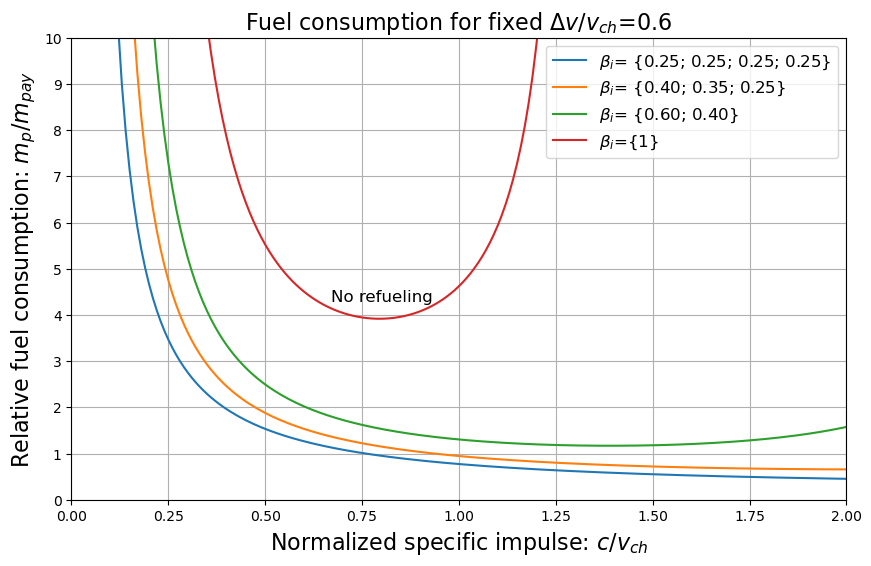

In [163]:
r1=0.6
r2_vec=np.arange(0.12,2.1,0.01)

betas_list=list((np.array([.25,.25,.25,.25]),np.array([.4,.35,.25]),np.array([.6,.4])))

fig=plt.figure(figsize=(10,6))
for betas in betas_list:
    ratio=[]
    for r2 in r2_vec:
        ratio.append(fuel_per_payload(r1,r2,betas))
    
    
    betas_str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in betas]) + '}'
    plt.plot(r2_vec, ratio, label=betas_str)
    
    
ratio_1=[]
r2_vec=np.arange(0.3,1.25,0.01)
for r2 in r2_vec:
    ratio_1.append(fuel_per_payload(r1,r2,np.array([1])))
    
plt.plot(r2_vec,ratio_1,label=r"$\beta_i$={1}")

    

    
plt.xlabel('Normalized specific impulse: $c/v_{ch}$',fontsize=16)  
plt.ylabel('Relative fuel consumption: $m_p/m_{pay}$',fontsize=16)   
plt.title(rf'Fuel consumption for fixed $\Delta v /v_{{ch}}$={r1}',fontsize=16) 
plt.xlim([0,2])
plt.ylim([0,10])
plt.yticks(np.arange(0, 11, 1))
plt.grid(True)  
plt.legend(loc="best",fontsize=12)
plt.text(0.8, 4.4, 'No refueling', fontsize=12, ha='center', va='center')

plt.savefig("figures/fuel_consumption.png")
